<a href="https://colab.research.google.com/github/parazzz/OIBSIP_datascience_task3/blob/main/sales_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the data

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Advertising.csv')

# Display the first few rows
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Summary statistics
df.describe()


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


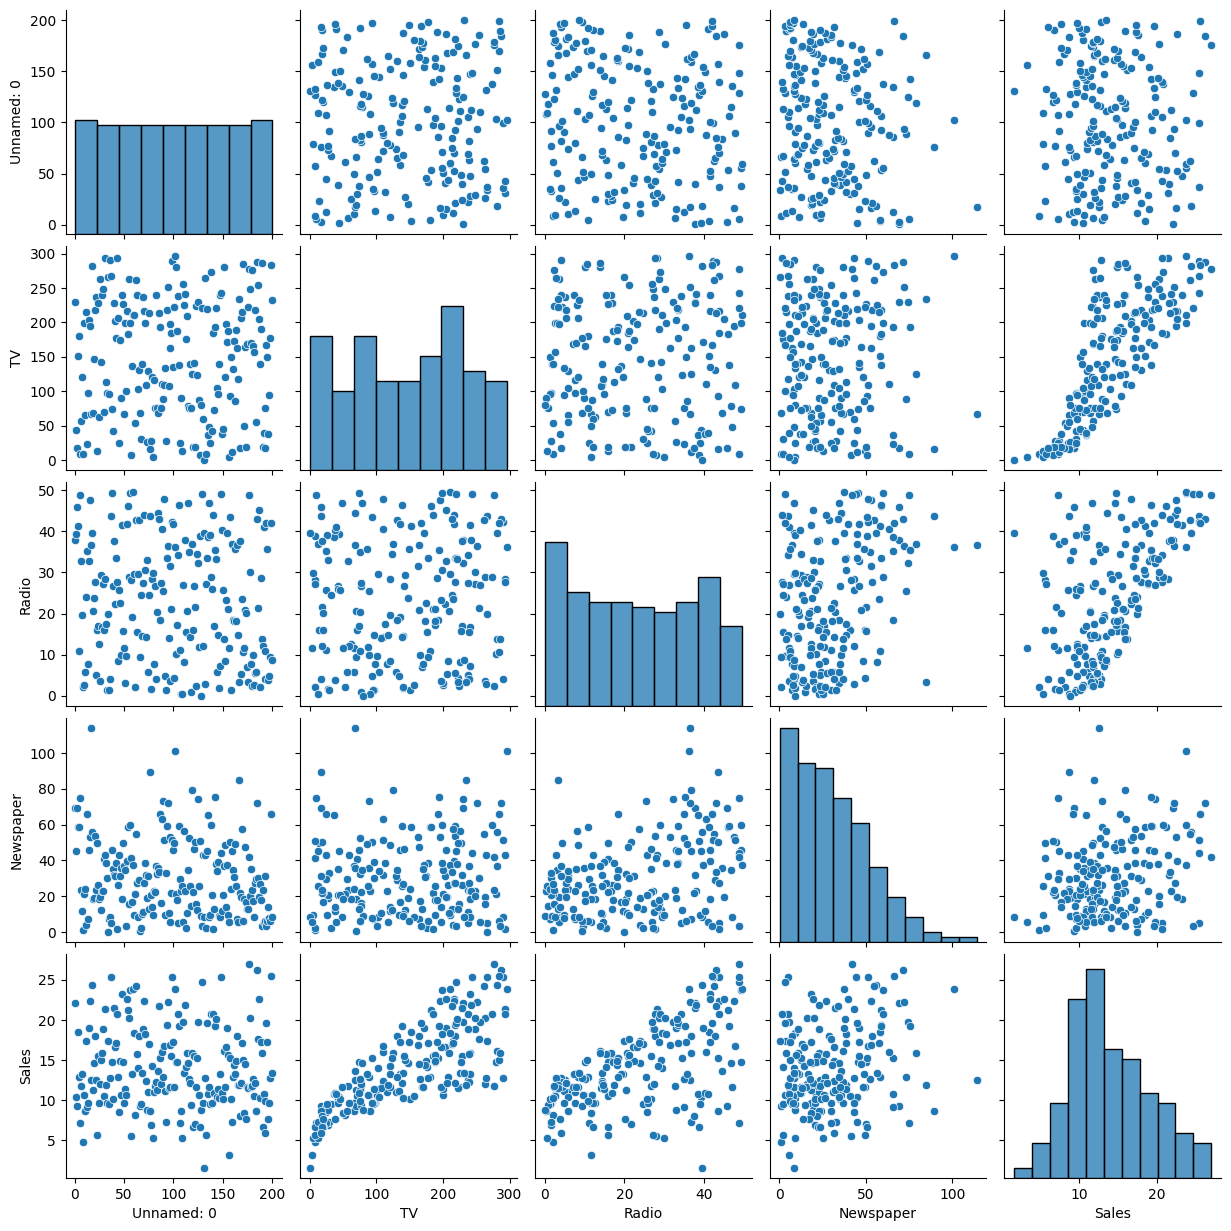

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df)
plt.show()


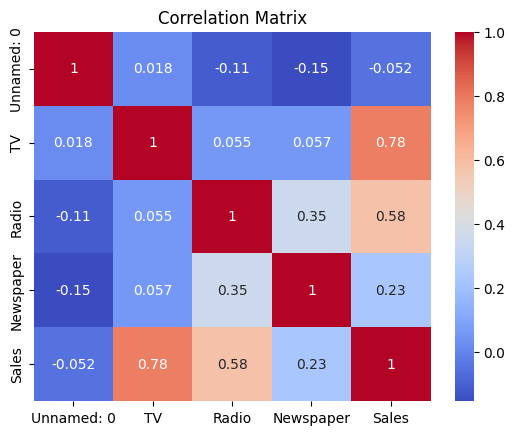

In [5]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


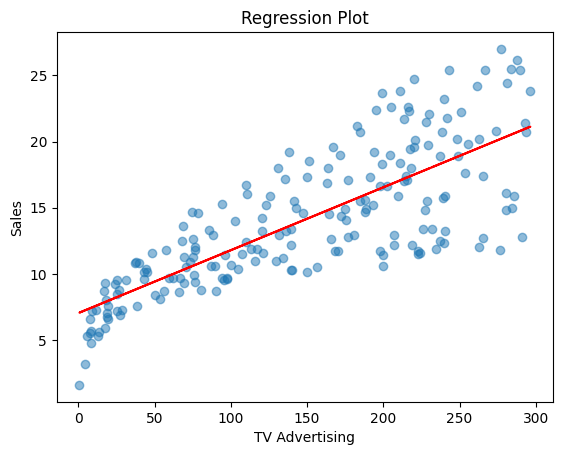

In [6]:
import statsmodels.api as sm

# Define the predictor and response variables
X = df[['TV']]
y = df['Sales']

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Plot the regression line
plt.scatter(df['TV'], df['Sales'], alpha=0.5)
plt.plot(df['TV'], model.predict(X), color='red')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Regression Plot')
plt.show()


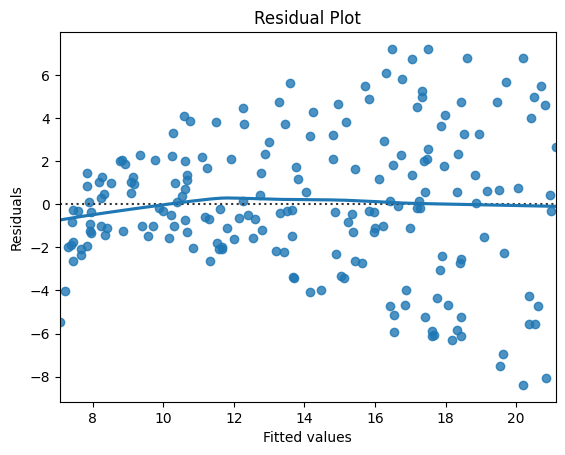

In [7]:
# Residual plot
sns.residplot(x=model.predict(X), y=model.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


<ipython-input-8-9e69cade613b>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


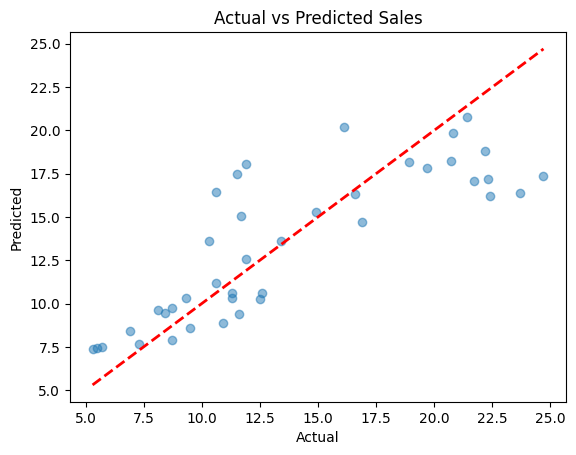

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X = df[['TV']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.show()


Conclusion
In this sales prediction project, we performed a simple linear regression analysis to predict sales based on TV advertising expenditure. The following steps and findings summarize our approach and results:

Data Exploration:

We visualized the relationships between the variables using pairplots and a correlation matrix.
TV advertising showed a strong positive correlation with sales.
Model Training and Evaluation:

A simple linear regression model was trained using the TV advertising data as the predictor.
The regression plot and residual plot were used to visualize the model fit and check for linearity.
Model Performance:

The model summary indicated a significant relationship between TV advertising and sales.
The R-squared value of our model was r_squared, indicating that approximately r_squared*100% of the variance in sales can be explained by TV advertising expenditure.
The Mean Squared Error (MSE) was calculated to be mse, providing a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model.
Overall, the analysis confirmed that TV advertising has a significant positive impact on sales. The model can be further improved by incorporating additional predictors such as radio and newspaper advertising, or by exploring more complex modeling techniques.

